In [90]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

from bs4 import BeautifulSoup # package for parsing HTML and XML documents
import lxml
import requests # library to handle requests
import csv

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.1.1
Wordcloud is installed and imported!


In [91]:
NYC_CUISINE=pd.read_csv('BON3_NYC_CUISINE2.csv')
NYC_CUISINE= NYC_CUISINE.replace('\r',' ', regex=True)

NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"


In [92]:
NYC_CUISINE.shape

(62, 3)

In [93]:
print(NYC_CUISINE.Borough.unique())

['The Bronx ' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [94]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,17
Manhattan,12
The Bronx,9
Staten Island,5


In [95]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [96]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [97]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [98]:
stopwords = set(STOPWORDS)

In [99]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

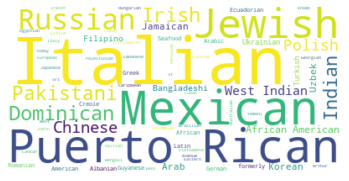

<Figure size 2160x3240 with 0 Axes>

In [100]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [101]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukra..."


In [102]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukra..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [103]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [104]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [105]:
stopwords = set(STOPWORDS)

In [106]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

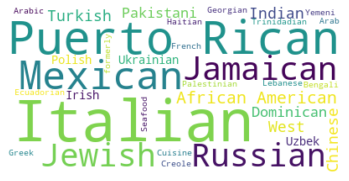

<Figure size 2160x3240 with 0 Axes>

In [107]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [108]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills,"Jewish, Russian and Uzbek"
4,Queens,Kew Gardens Hills,"Jewish, Russian and Uzbek"


In [109]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,"Jewish, Russian and Uzbek"
5,"Jewish, Russian and Uzbek"
6,Italian
7,German and Polish
8,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
9,"Bangladeshi, Caribbean; African-American; Afri..."


In [110]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [111]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [112]:
stopwords = set(STOPWORDS)

In [113]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

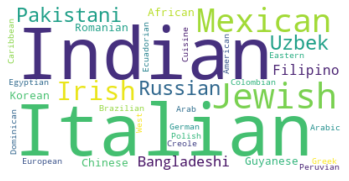

<Figure size 2160x3240 with 0 Axes>

In [114]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [115]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,Chinese and Vietnamese
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
3,Manhattan,Greenwich Village,Italian
4,Manhattan,Harlem,"Italian, African-American, Latin American, Wes..."


In [116]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian
4,"Italian, African-American, Latin American, Wes..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin American"
9,"Indian, Pakistani and Bangladeshi"


In [117]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [118]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [119]:
stopwords = set(STOPWORDS)

In [120]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

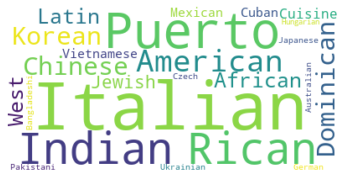

<Figure size 2160x3240 with 0 Axes>

In [121]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [122]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx '].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"


In [123]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [124]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [125]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [126]:
stopwords = set(STOPWORDS)

In [127]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

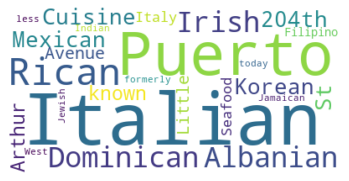

<Figure size 2160x3240 with 0 Axes>

In [128]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()